<a href="https://colab.research.google.com/github/tbtraltaa/tensorflow_developer/blob/main/C3/W2/ungraded_labs/C3_W2_Lab_2_sarcasm_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [115]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [161]:
vocab_size = 1200
embedding_dim = 32
max_length = 20
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [162]:
# sarcasm.json
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v

Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: /content/sarcasm.json
100% 5.64M/5.64M [00:00<00:00, 122MB/s]


In [163]:
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [164]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [165]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [166]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [167]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [168]:
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 20, 32)            38400     
                                                                 
 global_average_pooling1d_16  (None, 32)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_32 (Dense)            (None, 24)                792       
                                                                 
 dense_33 (Dense)            (None, 1)                 25        
                                                                 
Total params: 39,217
Trainable params: 39,217
Non-trainable params: 0
_________________________________________________________________


In [169]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.5161 - accuracy: 0.7361 - val_loss: 0.4062 - val_accuracy: 0.8117 - 3s/epoch - 5ms/step
Epoch 2/30
625/625 - 2s - loss: 0.3696 - accuracy: 0.8349 - val_loss: 0.3958 - val_accuracy: 0.8207 - 2s/epoch - 4ms/step
Epoch 3/30
625/625 - 3s - loss: 0.3512 - accuracy: 0.8425 - val_loss: 0.3960 - val_accuracy: 0.8222 - 3s/epoch - 4ms/step
Epoch 4/30
625/625 - 2s - loss: 0.3433 - accuracy: 0.8463 - val_loss: 0.3970 - val_accuracy: 0.8143 - 2s/epoch - 4ms/step
Epoch 5/30
625/625 - 2s - loss: 0.3400 - accuracy: 0.8494 - val_loss: 0.3966 - val_accuracy: 0.8211 - 2s/epoch - 4ms/step
Epoch 6/30
625/625 - 2s - loss: 0.3375 - accuracy: 0.8475 - val_loss: 0.3986 - val_accuracy: 0.8173 - 2s/epoch - 4ms/step
Epoch 7/30
625/625 - 3s - loss: 0.3355 - accuracy: 0.8508 - val_loss: 0.3986 - val_accuracy: 0.8180 - 3s/epoch - 4ms/step
Epoch 8/30
625/625 - 2s - loss: 0.3336 - accuracy: 0.8512 - val_loss: 0.3915 - val_accuracy: 0.8220 - 2s/epoch - 4ms/step
Epoch 9/30
625/625 - 2s 

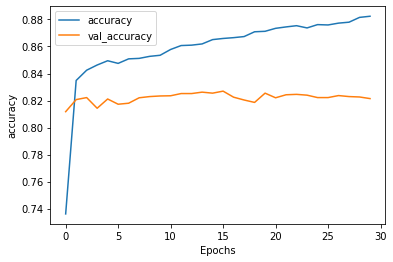

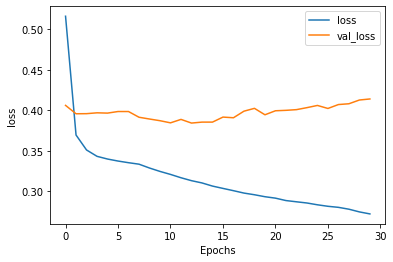

In [170]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [171]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store <OOV> <OOV> over secret <OOV> <OOV> for <OOV> <OOV> ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [172]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(1200, 32)


In [173]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [174]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.22332364]
 [0.6877259 ]]
